# Computational Intelligence
# Project A
## Task 16

####   Muhammad Sajid Ali - 391708
####   Kamil Karwacki - 355051
####   Praveen Mishra - 389850

Binary classification of normal walking and handicapped walking using the Artificial Neural Networks.

Sensor data: Sensor 2 and Sensor 4

Sensor signals: Accelaration and Gyroscope

Validation: 5-fold subject wise

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, resample, butter, filtfilt

`Measurement` class created to read and store data.

In [2]:
# this class stores all data from one file
class Measurement:
        
    def __init__(self, path, sensor):
        assert(sensor == 2 or sensor == 4)
        # member variables
        self.time = []
        self.acc  = [] 
        self.gyr  = [] 
        self.subject = str(path[8])
        self.l = 0
        # ---------------

        # constants
        seperator = ";"
        dataPath  = "../data/Sensors/" 
            
        # read all data
        data = np.genfromtxt(dataPath + path, skip_header=True, delimiter=seperator)
        
        self.time.append(data[:, 0])
        self.time = self.time[0]
        for i in range(0,3): # clice data matrix column wise
            self.acc.append(np.array(data[:, 1 + (sensor - 1)*6 + i]))
            self.gyr.append(np.array(data[:, 1 + (sensor - 1)*6 + 3 + i]))
        
        if "normal" in path: # set label
            self.l = 1
        
        # normalize
        for i in range(0,3):
            meana = np.mean(self.acc[i])
            stda = np.std(self.acc[i])
            meang = np.mean(self.gyr[i])
            stdg = np.std(self.gyr[i])
            self.acc[i] = (self.acc[i] - meana)/stda
            self.gyr[i] = (self.gyr[i] - meang)/stdg
        
        
        
        


`plotMeasurement` function defined to plot data from the `Measurement` class.

In [3]:
def plotMeasurement(m, xyz): # just utility for plotting a measurement
    x = [i for i in range(0, len(m.time))]
    y = m.acc[xyz]
    plt.figure()
    plt.plot(x,y)
    plt.ylim(min(y), max(y))
    plt.show()
    plt.pause(3)
    plt.close()

`cutMeasurement` function is used to make cuts to remove the initial and end fluctuations in the data corresponding to start and stop of the walk which we do not need in our training data.

In [4]:
def cutMeasurement(m, cut_start, cut_end): 
    m.time = m.time[cut_start : cut_end]
    m.acc[0] = m.acc[0][cut_start : cut_end]
    m.acc[1] = m.acc[1][cut_start : cut_end]
    m.acc[2] = m.acc[2][cut_start : cut_end]

# Read files

We read the files here. Please use $\texttt{filenames.txt}$ file. This file contains the names of all the files to be read. $\textit{Note: We have changed the names of files to make it easier to read.}$

The sensor 2 and sensor 4 data is stored in $\textbf{Sensor2_measurements}$ and $\textbf{Sensor4_measurements}$ respectively.

In [5]:
# read the  file with filenames, it is a list of strings (here only one big string
# because we have only one line
fileNames = open("../data/filenames.txt","r").read().splitlines()

Sensor2_measurements = []
Sensor4_measurements = []

# make a list of measurements for each sensor, containing both disabled and normal
for i in range(0,len(fileNames)):
    Sensor2_measurements.append(Measurement(fileNames[i], 2))
    Sensor4_measurements.append(Measurement(fileNames[i], 4))


Text(0.5, 1.0, 'Sensor 2 Subject 3')

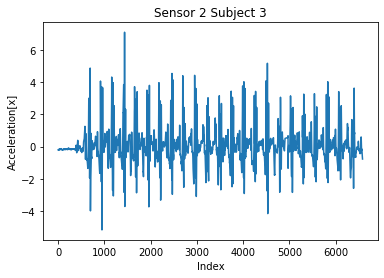

In [6]:
plt.plot(Sensor2_measurements[2].acc[0])
plt.xlabel("Index")
plt.ylabel("Acceleration[x]")
plt.title("Sensor 2 Subject 3")

Text(0.5, 1.0, 'Sensor 4 subject 3')

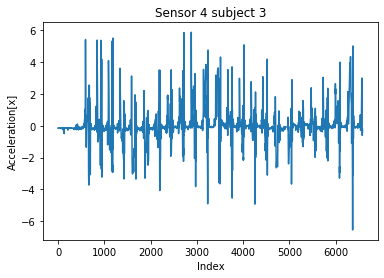

In [7]:
plt.plot(Sensor4_measurements[2].acc[0])
plt.xlabel("Index")
plt.ylabel("Acceleration[x]")
plt.title("Sensor 4 subject 3")

# Start and End cuts

Here, we remove the start and end data points that we do not need for training by using the `cutMeasurement` function. the start and end points were determined manually.

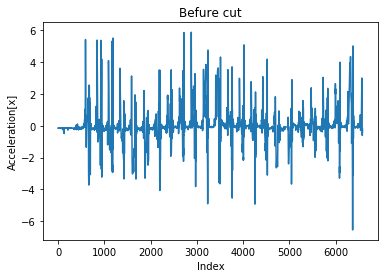

In [8]:
# ------------ cut the mearurement ---------------
# Cut points determined manually
cut_points = [[500, -100],[400, -200],[300,-100],[600,-50],[500,-10],[1900,-10],[10,-10],[100,-10],[1480,-10],[450,-100],
              [200,-150],[400,-10],[500,-10],[700,-10],[500,-20],[100,-10],[350,-100],[500,6950],[500,7550],[150,6200],
              [950,-10],[700,-10],[350,6550],[300,-10],[600,6700],[100,-50],[450,-50],[10,-10],[450,7900],[100,6100],[25,-10],
              [750,6800],[450,6700],[400,6600],[250,6300],[350,-150],[350,6900],[1700,-100],[500,-50],[150,6500],[550,6850],[50,-50],
              [350,6700],[550,7000],[500,-25],[200,6350],[300,-10],[100,-1],[600,-1],[50,6420],[100,-1]] 


plt.plot(Sensor4_measurements[2].acc[0])
plt.xlabel("Index")
plt.ylabel("Acceleration[x]")
plt.title("Befure cut")

for i in range(0, len(Sensor4_measurements)):
    
    cutMeasurement(Sensor4_measurements[i], cut_points[i][0], cut_points[i][1])
    cutMeasurement(Sensor2_measurements[i], cut_points[i][0], cut_points[i][1])


Text(0.5, 1.0, 'After cut')

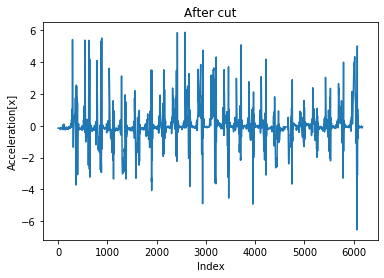

In [9]:
plt.plot(Sensor4_measurements[2].acc[0])
plt.xlabel("Index")
plt.ylabel("Acceleration[x]")
plt.title("After cut")

# Filtering

We have used butterworth filter here. `filter_wrapper` function is defined and used to filter all our data.

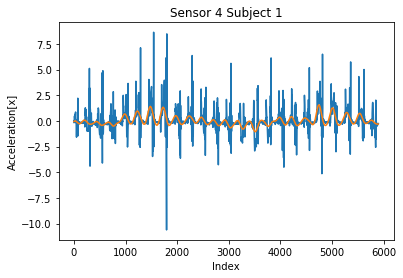

In [10]:
fc = 5 # cut-off frequency
fs = 200 # Sampling frequency
w = fc/fs/2
b, a = butter(5,w,'low')

# goes through measurements and filters acc and 
def filter_wrapper(m):
    for i in range(0,len(m)):
        for j in range(3):
            m[i].acc[j] = np.array(filtfilt(b, a, m[i].acc[j]))
        for j in range(3):
            m[i].gyr[j] = np.array(filtfilt(b, a, m[i].gyr[j]))

# Sensor 4
plt.plot(Sensor4_measurements[0].acc[0])
filter_wrapper(Sensor4_measurements)
plt.plot(Sensor4_measurements[0].acc[0])
plt.xlabel("Index")
plt.ylabel("Acceleration[x]")
plt.title("Sensor 4 Subject 1")
# Sensor 2
filter_wrapper(Sensor2_measurements)


# Segmentation and resampling

Here, we find peaks in the data by using the accelaration x data and cutting the data into samples. We also resample the data into 101 points for each sample. Then, we append the acc_x, acc_y, acc_z, gyrx, gyr_y and gyr_z data. We get samlples of size 606. We also add labels to the sample. 1 for normal and 0 for impaired walks. All the samples are stored in $\textbf{Sen2_Subjects_stepArray}$ and $\textbf{Sen2_Subjects_stepArray}$ respectively.

In [11]:
Sen2_Subjects_stepArray = []
Sen4_Subjects_stepArray = []


for i in range(9): # creates nine empty lists in which the steps of each subjects will be stored 
    Sen2_Subjects_stepArray.append([])
    Sen4_Subjects_stepArray.append([])

def cutIntoSteps(m, peaks, result, l):
    for k in range(0,len(peaks[0])-1):
        if k == 0: # append a full step [accxyzGyrxyz,L] into a give subjects array
            (result[int(m.subject)-1]).append([np.ndarray.tolist(resample(m.acc[0][0:peaks[0][k]],101)) + np.ndarray.tolist(resample(m.acc[1][0:peaks[0][k]],101)) + 
                                                np.ndarray.tolist(resample(m.acc[2][0:peaks[0][k]],101))
                                               + np.ndarray.tolist(resample(m.gyr[0][0:peaks[0][k]],101)) + 
                                               np.ndarray.tolist(resample(m.gyr[1][0:peaks[0][k]],101)) + np.ndarray.tolist(resample(m.gyr[2][0:peaks[0][k]],101)), l])
        else:
            (result[int(m.subject)-1]).append( [ np.ndarray.tolist(resample(m.acc[0][peaks[0][k]:peaks[0][k+1]],101)) + np.ndarray.tolist(resample(m.acc[1][peaks[0][k]:peaks[0][k+1]],101)) +
                            np.ndarray.tolist(resample(m.acc[2][peaks[0][k]:peaks[0][k+1]],101))
                            + np.ndarray.tolist(resample(m.gyr[0][peaks[0][k]:peaks[0][k+1]],101))
                            + np.ndarray.tolist(resample(m.gyr[1][peaks[0][k]:peaks[0][k+1]],101)) + np.ndarray.tolist(resample(m.gyr[2][peaks[0][k]:peaks[0][k+1]],101)), l])
            

for i in range(0,len(Sensor2_measurements)):
    label = Sensor2_measurements[i].l
    
    # Finding peaks
    peaks1 = find_peaks(Sensor2_measurements[i].acc[0],distance=200)
    peaks3 = find_peaks(Sensor4_measurements[i].acc[0],distance=200)
  
    # segment, resample and store
    cutIntoSteps(Sensor2_measurements[i], peaks1, Sen2_Subjects_stepArray, label)
    cutIntoSteps(Sensor4_measurements[i], peaks3, Sen4_Subjects_stepArray, label)
   

Additional cutting to remove first and last two samples just for getting better data. 

In [12]:
def first_last_remove(m):
    '''
    Removes first two and last two segments to clean up the data
    '''
    for i in range(0,len(m)):
        del m[i][0:2]
        del m[i][-2:]

In [13]:
first_last_remove(Sen2_Subjects_stepArray)
first_last_remove(Sen4_Subjects_stepArray)

Text(0.5, 1.0, 'Sensor2 first sample')

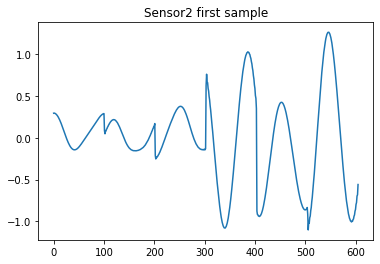

In [14]:
# Plot of first sample of Sensor 2
plt.plot(Sen2_Subjects_stepArray[0][0][0])
plt.title('Sensor2 first sample')

# Remove outliers

`remove_outliers_acc` and `remove_outliers_gyr` is defined and used to remove outliers by checking accelaration and gyroscope data respectively.

In [15]:
def remove_outliers_acc(steps, value):
    mean = [0 for i in range(303)]
    rmse = []

    #extract columns
    column = [0 for i in range(len(steps))]

    for j in range(303):
        for i in range(len(steps)):       
            column[i] = steps[i][0][j]
            
        mean[j] = np.mean(column)
    
    new_steps = []
    for step in steps:
        sample = np.array(step[0])
        if np.sqrt((sample[:303] - mean)**2).mean() < value:
            new_steps.append(step)

    return new_steps

In [16]:
def remove_outliers_gyr(steps, value):
    mean = [0 for i in range(303)]
    rmse = []

    #extract columns
    column = [0 for i in range(len(steps))]

    for j in range(303,606):
        for i in range(len(steps)):       
            column[i] = steps[i][0][j]
            
        mean[j-303] = np.mean(column)
    
    new_steps = []
    for step in steps:
        sample = np.array(step[0])
        if np.sqrt((sample[303:] - mean)**2).mean() < value:
            new_steps.append(step)
        
    return new_steps

Sensor 4: 
Initial:  133
After acc removal:  125
After gyr removal:  121
Sensor 4: 
Initial:  116
After acc removal:  109
After gyr removal:  104
Sensor 4: 
Initial:  139
After acc removal:  135
After gyr removal:  133
Sensor 4: 
Initial:  117
After acc removal:  103
After gyr removal:  99
Sensor 4: 
Initial:  138
After acc removal:  135
After gyr removal:  131
Sensor 4: 
Initial:  133
After acc removal:  128
After gyr removal:  126
Sensor 4: 
Initial:  101
After acc removal:  101
After gyr removal:  99
Sensor 4: 
Initial:  116
After acc removal:  115
After gyr removal:  111
Sensor 4: 
Initial:  109
After acc removal:  103
After gyr removal:  101
Sensor 2: 
Initial:  132
After acc removal:  132
After gyr removal:  103
Sensor 2: 
Initial:  115
After acc removal:  113
After gyr removal:  107
Sensor 2: 
Initial:  133
After acc removal:  132
After gyr removal:  115
Sensor 2: 
Initial:  120
After acc removal:  115
After gyr removal:  104
Sensor 2: 
Initial:  130
After acc removal:  99
After

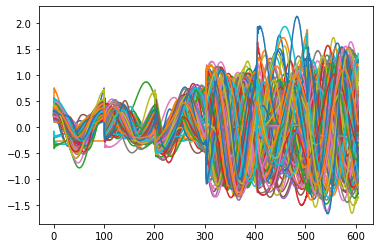

In [17]:
for step in Sen2_Subjects_stepArray[0]:
    plt.plot(step[0])

for i in range(9):
    print('Sensor 4: ')
    print('Initial: ',len(Sen4_Subjects_stepArray[i]))
    Sen4_Subjects_stepArray[i] = remove_outliers_acc(Sen4_Subjects_stepArray[i],0.4)
    print('After acc removal: ',len(Sen4_Subjects_stepArray[i]))
    Sen4_Subjects_stepArray[i] = remove_outliers_gyr(Sen4_Subjects_stepArray[i],0.7)
    print('After gyr removal: ',len(Sen4_Subjects_stepArray[i]))
    
for i in range(9):
    print('Sensor 2: ')
    print('Initial: ',len(Sen2_Subjects_stepArray[i]))
    Sen2_Subjects_stepArray[i] = remove_outliers_acc(Sen2_Subjects_stepArray[i],0.3)
    print('After acc removal: ',len(Sen2_Subjects_stepArray[i]))
    Sen2_Subjects_stepArray[i] = remove_outliers_gyr(Sen2_Subjects_stepArray[i],0.7)
    print('After gyr removal: ',len(Sen2_Subjects_stepArray[i]))
    
print('Plot before removing ouliers for subject 1')

Plot after removing outliers for subject 1.

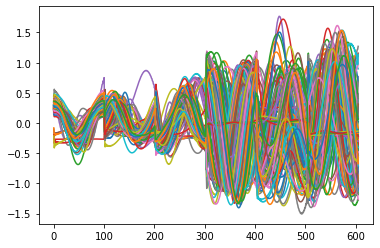

In [18]:
for step in Sen2_Subjects_stepArray[0]:
    plt.plot(step[0])

Plot of all sensor 4 samples.

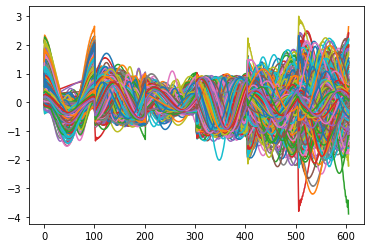

In [19]:
for i in range(0,len(Sen4_Subjects_stepArray)):
    for j in range(0,len(Sen4_Subjects_stepArray[i])):
        plt.plot(Sen4_Subjects_stepArray[i][j][0])

Plot of all sensor 2 samples.

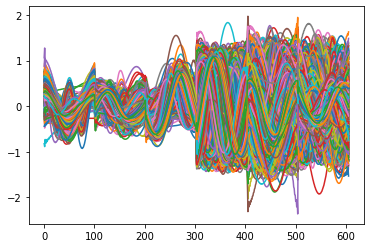

In [20]:
for i in range(0,len(Sen2_Subjects_stepArray)):
    for j in range(0,len(Sen2_Subjects_stepArray[i])):
        plt.plot(Sen2_Subjects_stepArray[i][j][0])

# Neural Network

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [22]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32 ,input_shape=(606,),kernel_initializer = 'uniform',activation="relu"),
    tf.keras.layers.Dense(8,kernel_initializer = 'uniform',activation="relu"),
    tf.keras.layers.Dense(1,kernel_initializer = 'uniform',activation="sigmoid")
    ])
    
    model.compile( optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return model

`NN_model_evaluate` splits the data into training and test data. It also incorporates 5-fold subject wise validation. It trains and tests the data and returns mean accuracy obtained.

In [23]:
def NN_model_evaluate(m):
    
    # Collect data and labels
    X = []
    Y = []
    groups = []
    
    for i in range(0,len(m)):
        for j in range(0,len(m[i])):
            X.append(m[i][j][0])
            Y.append(m[i][j][1])
            groups.append(i)
            
    X = np.asarray(X)
    Y = np.asarray(Y)
    groups = np.asarray(groups)
    
    X, Y, groups = shuffle(X,Y,groups)
    group_kfold = GroupKFold(n_splits=5)
    group_kfold.get_n_splits(X, Y, groups)
    
    mean_acc = []
    for train_index, test_index in group_kfold.split(X,Y,groups):
        model = create_model()
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        
        model.fit(X_train,Y_train,epochs=25,shuffle=True,verbose=0)
        
        
        loss, accuracy = model.evaluate(X_test,Y_test,verbose=0)
        print('Loss: ',loss)
        print('Accuracy: ',accuracy)
        mean_acc.append(accuracy)
    
    return np.mean(mean_acc)

In [24]:
# Run for Sensor 2
acc = []
for i in range(10):
    acc.append(NN_model_evaluate(Sen2_Subjects_stepArray))
print("final accuracy :", np.mean(acc),'+-', np.std(acc))

Loss:  1.4291488647460937
Accuracy:  0.6869565
Loss:  2.2828442169272383
Accuracy:  0.4347826
Loss:  2.9172381163411534
Accuracy:  0.4226804
Loss:  0.8231860236312771
Accuracy:  0.7113402
Loss:  1.8610201027928566
Accuracy:  0.47959185
Loss:  1.5350422382354736
Accuracy:  0.67826086
Loss:  1.9380997885828433
Accuracy:  0.51086956
Loss:  2.8513269793127
Accuracy:  0.38659793
Loss:  0.8783090212910446
Accuracy:  0.6958763
Loss:  2.070849513825105
Accuracy:  0.4387755
Loss:  1.437389698235885
Accuracy:  0.73913044
Loss:  1.9265896341075068
Accuracy:  0.5
Loss:  2.9671968971331095
Accuracy:  0.4072165
Loss:  0.9095494649805052
Accuracy:  0.7113402
Loss:  2.4144877025059293
Accuracy:  0.48979592
Loss:  1.2657195132711658
Accuracy:  0.6695652
Loss:  1.7989609189655469
Accuracy:  0.5380435
Loss:  2.692039615100192
Accuracy:  0.41752577
Loss:  0.7538048840060676
Accuracy:  0.7113402
Loss:  1.9374665824734434
Accuracy:  0.4030612
Loss:  1.0359061583228732
Accuracy:  0.6956522
Loss:  2.014278702

In [25]:
# run for Sensor 4
acc = []
for i in range(10):
    acc.append(NN_model_evaluate(Sen4_Subjects_stepArray))
print("final accuracy :", np.mean(acc), "+-", np.std(acc))

Loss:  1.651271623328216
Accuracy:  0.37593985
Loss:  0.9164335852083952
Accuracy:  0.54347825
Loss:  1.361389616727829
Accuracy:  0.4977778
Loss:  1.3390430383854084
Accuracy:  0.45045045
Loss:  0.8696839587633
Accuracy:  0.6418605
Loss:  1.3771732194083077
Accuracy:  0.39097744
Loss:  0.891340612846872
Accuracy:  0.5782609
Loss:  1.2988239969147577
Accuracy:  0.48
Loss:  1.279853833688272
Accuracy:  0.45045045
Loss:  0.8446672223335089
Accuracy:  0.6465116
Loss:  1.5744961397092145
Accuracy:  0.35338345
Loss:  0.9741642578788425
Accuracy:  0.50869566
Loss:  1.1630997366375393
Accuracy:  0.47111112
Loss:  1.187767143722053
Accuracy:  0.4234234
Loss:  0.976647539471471
Accuracy:  0.63255817
Loss:  1.7328625648541558
Accuracy:  0.36842105
Loss:  0.9506924898728081
Accuracy:  0.50869566
Loss:  1.2337985393736097
Accuracy:  0.48
Loss:  1.0965887125547942
Accuracy:  0.43693694
Loss:  0.9557072301243626
Accuracy:  0.627907
Loss:  1.4071455947438578
Accuracy:  0.40601504
Loss:  0.88355408958

# Sample wise

We used this for sample wise evaluation. The same Neural Network is used here. 

In [26]:
# Archived

def NN_evaluate(input_data):
    '''
    Creates data, builds model, trains the network and then tests the model.
    
    Input:
    input_data = can be -> acc_sen2_filtered / acc_sen4_filtered / gyr_sen2_filtered / gyr_sen4_filtered
    
    Output:
    Test accuracy and Test loss
    '''
    # Collect data and labels
    X = []
    Y = []
    
    for i in range(0,len(input_data)):
        for j in range(0,len(input_data[i])):
            X.append(input_data[i][j][0])
            Y.append(input_data[i][j][1])
    
    # Creates the data required for NN
    train_data, test_data, train_label, test_label = train_test_split(X,Y,test_size=0.2)
    
    # Convert lists to array
    train_data = np.asarray(train_data)
    test_data = np.asarray(test_data)
    train_label = np.asarray(train_label)
    test_label = np.asarray(test_label)
    
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.fit_transform(test_data)
    
    model = create_model()
    # Train the NN
    model.fit(train_data,train_label,validation_split=0.2,epochs=25)
    
    # Evaluate
    test_loss, test_acc = model.evaluate(test_data,test_label,verbose=0)
    
    print('Test Loss: ',test_loss,'Test accuracy: ',test_acc)
    

    

In [27]:
# Sensor 2
NN_evaluate(Sen2_Subjects_stepArray)

Train on 564 samples, validate on 142 samples
Epoch 1/25
564/564 [==============================] - 1s 2ms/sample - loss: 0.6910 - accuracy: 0.6383 - val_loss: 0.6851 - val_accuracy: 0.7254
Epoch 2/25
564/564 [==============================] - 0s 103us/sample - loss: 0.6765 - accuracy: 0.7039 - val_loss: 0.6595 - val_accuracy: 0.7254
Epoch 3/25
564/564 [==============================] - 0s 97us/sample - loss: 0.6327 - accuracy: 0.7181 - val_loss: 0.6105 - val_accuracy: 0.7113
Epoch 4/25
564/564 [==============================] - 0s 98us/sample - loss: 0.5809 - accuracy: 0.7340 - val_loss: 0.5754 - val_accuracy: 0.7113
Epoch 5/25
564/564 [==============================] - 0s 91us/sample - loss: 0.5353 - accuracy: 0.7535 - val_loss: 0.5600 - val_accuracy: 0.7254
Epoch 6/25
564/564 [==============================] - 0s 121us/sample - loss: 0.4974 - accuracy: 0.7642 - val_loss: 0.5493 - val_accuracy: 0.7324
Epoch 7/25
564/564 [==============================] - 0s 119us/sample - loss: 0.468

In [28]:
# Sensor 4
NN_evaluate(Sen4_Subjects_stepArray)

Train on 656 samples, validate on 164 samples
Epoch 1/25
656/656 [==============================] - 1s 1ms/sample - loss: 0.6927 - accuracy: 0.5244 - val_loss: 0.6917 - val_accuracy: 0.5671
Epoch 2/25
656/656 [==============================] - 0s 175us/sample - loss: 0.6879 - accuracy: 0.5899 - val_loss: 0.6823 - val_accuracy: 0.5976
Epoch 3/25
656/656 [==============================] - 0s 148us/sample - loss: 0.6715 - accuracy: 0.6052 - val_loss: 0.6680 - val_accuracy: 0.6098
Epoch 4/25
656/656 [==============================] - 0s 107us/sample - loss: 0.6451 - accuracy: 0.6265 - val_loss: 0.6584 - val_accuracy: 0.6037
Epoch 5/25
656/656 [==============================] - 0s 94us/sample - loss: 0.6274 - accuracy: 0.6433 - val_loss: 0.6532 - val_accuracy: 0.5976
Epoch 6/25
656/656 [==============================] - 0s 89us/sample - loss: 0.6079 - accuracy: 0.6555 - val_loss: 0.6416 - val_accuracy: 0.6159
Epoch 7/25
656/656 [==============================] - 0s 105us/sample - loss: 0.59

# For plots

In [29]:
def NN_model_evaluate(m):
    
    # Collect data and labels
    X = []
    Y = []
    groups = []
    
    for i in range(0,len(m)):
        for j in range(0,len(m[i])):
            X.append(m[i][j][0])
            Y.append(m[i][j][1])
            groups.append(i)
            
    X = np.asarray(X)
    Y = np.asarray(Y)
    groups = np.asarray(groups)
    
    X, Y, groups = shuffle(X,Y,groups)
    group_kfold = GroupKFold(n_splits=5)
    group_kfold.get_n_splits(X, Y, groups)
    
    mean_acc = 0
    for train_index, test_index in group_kfold.split(X,Y,groups):
        model = create_model()
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        
        history = model.fit(X_train,Y_train,epochs=25,validation_split=0.2,shuffle=True,verbose=0)
        
        return history

In [30]:
history = NN_model_evaluate(Sen2_Subjects_stepArray)

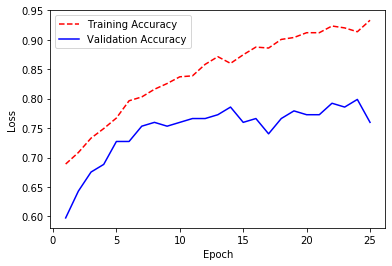

In [31]:

# Get training and test loss histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [32]:
np.mean(history.history['val_accuracy'])

0.74675333